# Python, Spark and R in one Notebook 

From the instructions of [all-spark-notebook](https://github.com/jupyter/docker-stacks/tree/master/all-spark-notebook) and [Stackoverflow](https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook).


In [1]:
import datetime
print('Last run:', datetime.datetime.utcnow(), 'UTC')  # timezone can't be detected from browser

Last run: 2018-03-15 14:11:32.300817 UTC


In [2]:
import pyspark
sc = pyspark.SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

## Variable transfer from a python to the R

In [3]:
# in python
rdd = sc.parallelize(range(1000))
sample = rdd.takeSample(False, 10)
sample

[19, 205, 265, 669, 26, 105, 824, 270, 387, 61]

In [4]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': sample
})

In [8]:
%%sh 
pip install rpy2
# Check if rpy2 is correctly installed

In [9]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

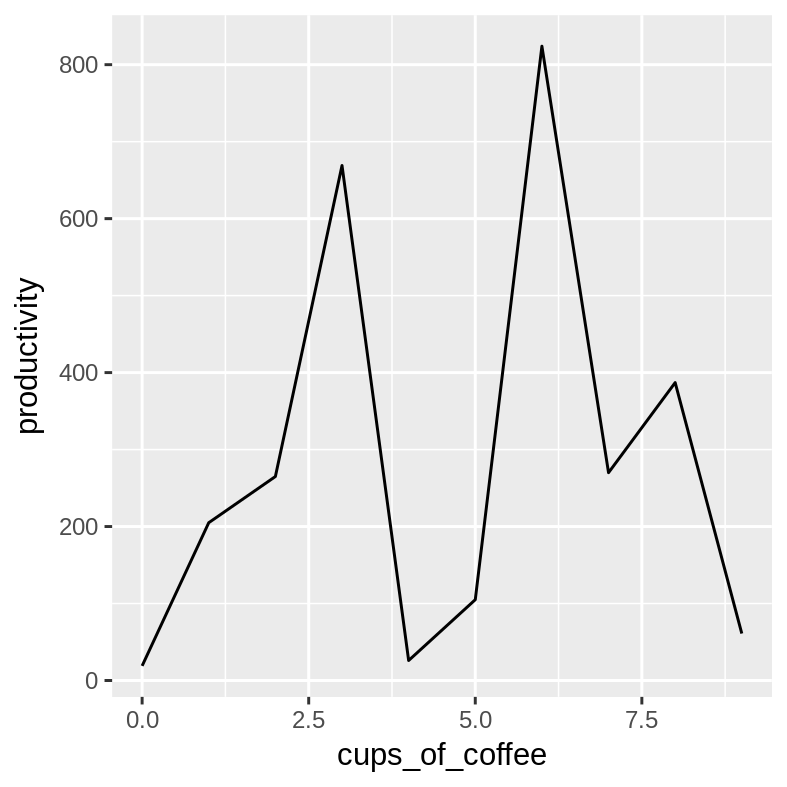

In [11]:
%%R -i df -w 10 -h 10 --units cm -r 200
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

## R Spark kernel

In [12]:
%%R -w 5 -h 5 --units cm -r 200
library(SparkR)

as <- sparkR.session("local[*]")

# do something to prove it works
df <- as.DataFrame(iris)
head(filter(df, df$Petal_Width > 0.2))

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘SparkR’


  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    cov, filter, lag, na.omit, predict, sd, var, window


  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.data.frame, colnames, colnames<-, drop, endsWith, intersect,
    rank, rbind, sample, startsWith, subset, summary, transform, union


  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Spark package found in SPARK_HOME: /usr/local/spark

  warnings.warn(x, RRuntimeWarning)


Launching java with spark-submit command /usr/local/spark/bin/spark-submit   sparkr-shell /tmp/RtmptqLmQ9/backend_port154464fa61 
  Sepal_Length Sepal_Width Petal_Length Petal_Width Species
1          5.4         3.9          1.7         0.4  setosa
2          4.6         3.4          1.4         0.3  setosa
3          5.7         4.4          1.5         0.4  setosa
4          5.4         3.9          1.3         0.4  setosa
5          5.1         3.5          1.4         0.3  setosa
6          5.7         3.8          1.7         0.3  setosa
